In [1]:
import torch
import matplotlib.pyplot as plt
import gymnasium as gym

import models.reinforce as reinforce
import utils
import sys

sys.argv=['']
args = utils.parse_args()

device = torch.device("cuda" if torch.cuda.is_available() and args.cuda else "cpu")

# CartPole-v1: considered as solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.
# LunarLander-v2: solved is 200 points.

env = gym.make(args.gym_id, render_mode='rgb_array')
agent = reinforce.Agent(env, device)
rewards, avg_rewards = agent.train(env, args, device)

Namespace(exp_name='utils', gym_id='CartPole-v1', cuda=True, max_episodes=500, save_model=True)
New max score reached at 0, value 11.0
New max score reached at 1, value 31.0
New max score reached at 3, value 47.0
New max score reached at 32, value 58.0
New max score reached at 42, value 85.0
New max score reached at 69, value 105.0
New max score reached at 112, value 113.0
New max score reached at 135, value 187.0
New max score reached at 194, value 193.0
New max score reached at 211, value 205.0
New max score reached at 222, value 345.0
New max score reached at 233, value 458.0
New max score reached at 261, value 500.0


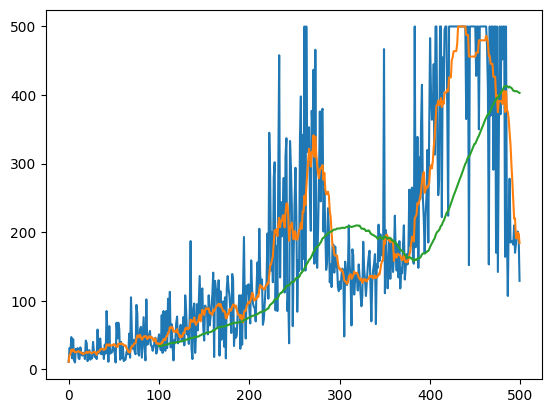

In [2]:
mov_avg = utils.moving_avg(rewards)

plt.plot(rewards)
plt.plot(mov_avg)
plt.plot(range(100, len(avg_rewards)+100),avg_rewards)
plt.show()

Moviepy - Building video /mnt/c/Users/giuli/Desktop/santanna/RLImplementations/ppoImplementation/video/rl-video-episode-0.mp4.
Moviepy - Writing video /mnt/c/Users/giuli/Desktop/santanna/RLImplementations/ppoImplementation/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /mnt/c/Users/giuli/Desktop/santanna/RLImplementations/ppoImplementation/video/rl-video-episode-0.mp4


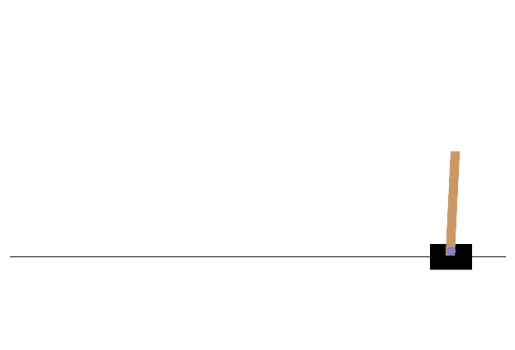

In [3]:
sys.argv=['']
args = utils.parse_args()

env = gym.make(args.gym_id, render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, 'video')

net = reinforce.PolicyNet(env.observation_space.shape[0], env.action_space.n, 128)

utils.save_video_of_model(net, args, 'Results/checkpoint_REINFORCE.pth')